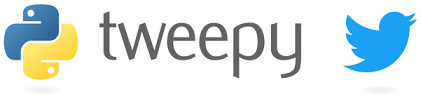

## Análisis de Twitter con Tweepy y TexBlob

Un "tuit" o tweet es una publicación de un usuario en la red social Twitter. Como parte del mensaje, podemos encontrar además de texto, diferentes elementos multimedia (imagenes, videos, audio, etc.), enlaces y los populares emoticones.

La estructura de un tweet la podemos observar en la siguiente imagen:

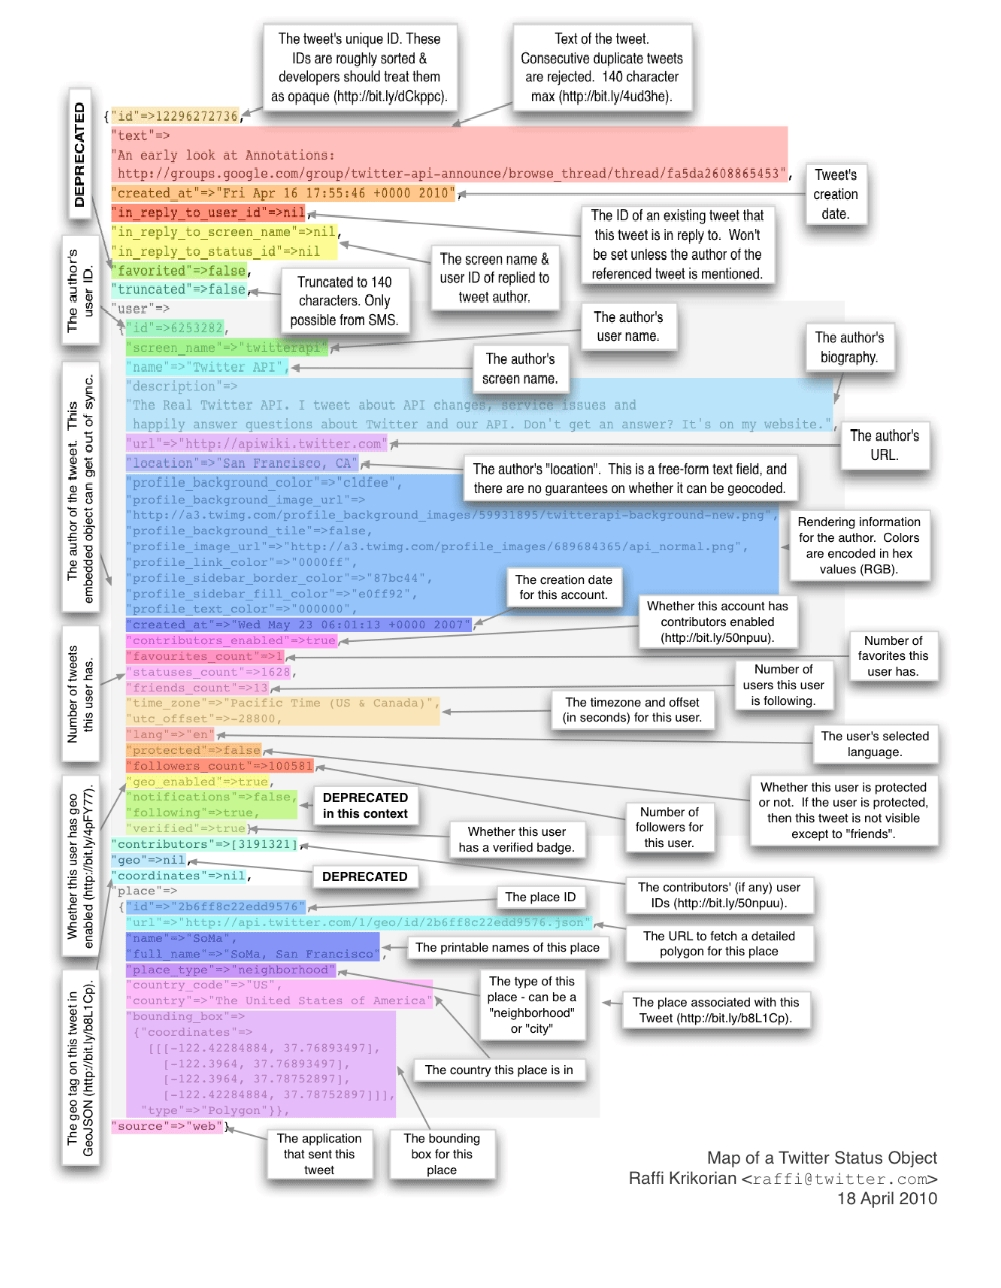


### 1. ¿Cómo extraemos datos de Twitter?

Para acceder al **API de Twitter**, es requisito indispensable obtener las credenciales como developer.  Dichas credenciales las otorga Twitter luego de registrarse en su plataforma developer en este enlace:
https://developer.twitter.com/en/apply-for-access

Las credenciales estan compuestas por cuatro datos:
* CONSUMER_KEY
* CONSUMER_SECRET
* ACCESS_TOKEN
* ACCESS_SECRET

Al ser datos privados, crearemos un archivo Python llamado credenciales.py y configuramos los valores de estas variables asi:

### Consume:
* CONSUMER_KEY    = "tu c-key"
* CONSUMER_SECRET = "tu c-secret"

### Access:
* ACCESS_TOKEN  = "tu a-token"
* ACCESS_SECRET = "tu a-secret"

### 2. Importación de librerias

In [1]:
# La libreria Tweepy permitira acceder a Twitter via las credenciales de developer
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import tweepy,json
# Importamos nuestras claves de acceso a Twitter desde el archivo credenciales
# Tenerlas en un archivo, nos permite manejarlas como variables
from credenciales import *    
import pandas as pd
import numpy as np

### 3. Configuración de acceso a Twitter App

In [2]:
# Configuracion del API:
def twitter_setup():
    """
    Esta funcion permite configurar el API de Twitter 
    con nuestras credenciales como developer
    """
    # Autenticacion y acceso utilizando las claves:
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

    # Devolver API con autenticación
    api = tweepy.API(auth)
    return api

### 4. Extracción de Tweets

**OPCION #1:** utilizando la funcion **extractor** de Tweepy

Extraeremos los tweets de un usuario especifico.  Se especifica en screen_name="el nombre del usuario", count=la cantidad de tweets 

In [3]:
# Extracción de tweets
# Creamos el objeto extractor:
extractor = twitter_setup()

# Creamos una lista de tweets de la siguiente manera:
tweets = extractor.user_timeline(screen_name="CocaCola", count=200)
print("Número de tweets extraídos: {}.\n".format(len(tweets)))

# Visualizamos los 5 tweets más recientes:
print("5 tweets recientes:\n")
for tweet in tweets[:5]:
    print(tweet.text)
    print()

Número de tweets extraídos: 200.

5 tweets recientes:

@dominos We just call it a Coke! 😎

@ms_ceciliajane Hi Cecilia. Please call our fountain/freestyle team directly at 1-800-241-2653.

@Brettonfry We'd like to help, Bretton. Please give us a call (800) GET-COKE, Mon-Fri, 9a-7p EST, providing Referen… https://t.co/jrRYv8A5NB

@UKCoachSkinner Cheers to the Wildcats! 🏐

@B3nzin0 Thanks for reaching out to us. Our deliveries are organized regionally through our local, independent bott… https://t.co/SR6ngJMJYc



**OPCION #2:** utilizando la clase **MyStreamListener** de Tweepy

Extraeremos los tweets de acuerdo a las palabras clave que se especifiquen (idenpendientemente del nombre del usuario)

Después de obtener acceso a los datos de Twitter, ahora crearemos un archivo para guardar todos los tweets encontrados.

In [22]:
 # Autenticacion y acceso utilizando las claves:
auth_l = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth_l.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

In [24]:
tweet_list=[]
class MyStreamListener(tweepy.StreamListener):
    def __init__(self,api=None):
        super(MyStreamListener,self).__init__()
        self.num_tweets=0
        self.file=open("tweet.txt","w")
    def on_status(self,status):
        tweet=status._json
        self.file.write(json.dumps(tweet)+ '\n')
        tweet_list.append(status)
        self.num_tweets+=1
        if self.num_tweets<1000:
            return True
        else:
            return False
        self.file.close()

Ahora crearemos un filtro que extraerá tweets basados **en ciertas palabras que se mencionan**. Básicamente, extraerá tweets que contengan las palabras válidas que desemos.  Los tweets los graba en el archivo **tweet.txt**

In [7]:
# Creamos un objeto de transmisión y autenticamos
l = MyStreamListener () 
stream = tweepy.Stream (auth_l, l)
# esta línea filtra flujos de datos en Twitter para capturar datos por palabras clave
stream.filter (track = ['covid', 'corona', 'covid19', 'coronavirus', 
'mascarilla', 'desinfectante', 'distanciamiento social'])

stream.filter (track = ['fraudeenmesa','keiko fujimori','pedro castillo',
                        'conteo','actas','sagasti'])

Verificamos la extstencia del archivo **text.txt** en nuestro directorio de trabajo y le hacemos una copia.  Leemos luego los tweets almacenados en el archivo **copia** de la siguiente manera:

In [25]:
tweets_data_path='tweet_covid.txt'
tweets_data=[]
tweets_file=open(tweets_data_path,"r")
# Leemos los tweets y los pasamos a una lista
for line in tweets_file:
    tweet=json.loads(line)
    tweets_data.append(tweet)
tweets_file.close()
# Visualizamos el contenido del primer tweet
print(tweets_data[0])

{'created_at': 'Tue Jun 15 19:54:26 +0000 2021', 'id': 1404890058386182154, 'id_str': '1404890058386182154', 'text': 'RT @VaxHuntersCan: [ON] Did you know Peel has a standby list? Check it out!\nhttps://t.co/CNwIgjxojp #VHCDose2 #COVID19ON #vhcON', 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 55699327, 'id_str': '55699327', 'name': 'Sarah says get vaxxed 💉😷', 'screen_name': 'sarahrimmington', 'location': 'Toronto, Canada', 'url': None, 'description': 'I tweet a lot about the Toronto Raptors. I also have stuff to say about COVID-19 vaccine apartheid, which is systemic racism. #PeoplesVaccine #TRIPSwaiver', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1949, 'friends_count': 3349, 'listed_count': 49, 'favourites_count

In [26]:
# Extraemos algunas variables relevantes
ids = [tweet['id_str'] for tweet in tweets_data]
times = [tweet['created_at'] for tweet in tweets_data]
users = [tweet['user']['name'] for tweet in tweets_data]
texts = [tweet['text'] for tweet in tweets_data]
lats = [(T['geo']['coordinates'][0] if T['geo'] else None) for T in tweets_data]
lons = [(T['geo']['coordinates'][1] if T['geo'] else None) for T in tweets_data]
place_names = [(T['place']['full_name'] if T['place'] else None) for T in tweets_data]
place_types = [(T['place']['place_type'] if T['place'] else None) for T in tweets_data]

In [27]:
ids[0],times[0], users[0], texts[0]

('1404890058386182154',
 'Tue Jun 15 19:54:26 +0000 2021',
 'Sarah says get vaxxed 💉😷',
 'RT @VaxHuntersCan: [ON] Did you know Peel has a standby list? Check it out!\nhttps://t.co/CNwIgjxojp #VHCDose2 #COVID19ON #vhcON')

**OPCION #3:** utilizando el metodo **api.search** de Tweepy

In [52]:
import csv #Import csv
import os

In [93]:
api = twitter_setup()

csvFile = open("segunda_vuelta1.csv", 'a', newline='', encoding='utf-8')
try:
    writer = csv.writer(csvFile, quoting=csv.QUOTE_ALL)
    writer.writerow(["created_at", "text", "len", "likes", "RTs", "user_name"])
    
    for tweet in tweepy.Cursor(api.search,
                           q = "#fraudeenmesa -filter:retweets", count=5000,
                           since = "2021-06-8",
                           until = "2021-06-14",
                           lang = "es").items():
        writer.writerow([tweet.created_at, tweet.text,
                        tweet.favorite_count, tweet.retweet_count, tweet.user.screen_name])
finally:
    csvFile.close()


TypeError: 'float' object is not callable

Como se puede observar, en la opcion 1 y 2 los datos se encuentran crudos.  Tendremos que pasar los datos relevantes de los tweets a un dataframe para pader trabajarlos.  En cambio, bajo la opcion 3, ya tenemos los datos relevantes en un archivo delimintado por comas.

### 1.4. Creación del Dataframe

In [90]:
# Creamos el dataframe de pandas desde la lista de tweets obtenidos mediante las credenciales de Twitter 
# y contenidos en la lista tweets:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Mostramos las 10 primeras observaciones del dataframe:
display(data.head(10))

,Tweets
0,@dominos We just call it a Coke! 😎
1,@ms_ceciliajane Hi Cecilia. Please call our fo...
2,"@Brettonfry We'd like to help, Bretton. Please..."
3,@UKCoachSkinner Cheers to the Wildcats! 🏐
4,@B3nzin0 Thanks for reaching out to us. Our de...
5,"@GriffinGonzalez We're glad you asked, Griffin..."
6,@FairleyGraphic ❤️🧡💛💚💙💜
7,@Swiftino_ Thanks for reaching out and we'd li...
8,@vanduzee You can enjoy Coke with Coffee with ...
9,@Carabear_24 Hi Cara. While we can't make any ...


In [29]:
# Creamos el dataframe de pandas desde la lista de tweets obtenidos mediante las credenciales de Twitter:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# Mostramos los as 10 primeras observaciones del dataframe:
display(data.head(10))

,Tweets
0,@dominos We just call it a Coke! 😎
1,@ms_ceciliajane Hi Cecilia. Please call our fo...
2,"@Brettonfry We'd like to help, Bretton. Please..."
3,@UKCoachSkinner Cheers to the Wildcats! 🏐
4,@B3nzin0 Thanks for reaching out to us. Our de...
5,"@GriffinGonzalez We're glad you asked, Griffin..."
6,@FairleyGraphic ❤️🧡💛💚💙💜
7,@Swiftino_ Thanks for reaching out and we'd li...
8,@vanduzee You can enjoy Coke with Coffee with ...
9,@Carabear_24 Hi Cara. While we can't make any ...


In [30]:
# Métodos internos de un solo objeto de tweet:
print(dir(tweets[0]))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_api', '_json', 'author', 'contributors', 'coordinates', 'created_at', 'destroy', 'entities', 'favorite', 'favorite_count', 'favorited', 'geo', 'id', 'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'parse', 'parse_list', 'place', 'retweet', 'retweet_count', 'retweeted', 'retweets', 'source', 'source_url', 'text', 'truncated', 'user']


In [31]:
# Imprimimos información del primer tweet:
print(tweets[0].id)
print(tweets[0].created_at)
print(tweets[0].source)
print(tweets[0].favorite_count)
print(tweets[0].retweet_count)
print(tweets[0].geo)
print(tweets[0].coordinates)
print(tweets[0].entities)

1404924450492063747
2021-06-15 22:11:05
Sprinklr
81
5
None
None
{'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'dominos', 'name': "Domino's Pizza", 'id': 31444922, 'id_str': '31444922', 'indices': [0, 8]}], 'urls': []}


### 1.5. Adición de datos relevantes

In [32]:
# Datos relevantes en nuevas columnas:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at for tweet in tweets])
data['Source'] = np.array([tweet.source for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])

# Visualización de los primeros 10 elementos del dataframe:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs
0,@dominos We just call it a Coke! 😎,34,1404924450492063747,2021-06-15 22:11:05,Sprinklr,81,5
1,@ms_ceciliajane Hi Cecilia. Please call our fo...,95,1404917273685544965,2021-06-15 21:42:34,Sprinklr,0,0
2,"@Brettonfry We'd like to help, Bretton. Please...",140,1404901074729848832,2021-06-15 20:38:12,Sprinklr,0,0
3,@UKCoachSkinner Cheers to the Wildcats! 🏐,41,1404856663564226563,2021-06-15 17:41:44,Sprinklr,77,9
4,@B3nzin0 Thanks for reaching out to us. Our de...,140,1404853181771886597,2021-06-15 17:27:54,Sprinklr,0,0
5,"@GriffinGonzalez We're glad you asked, Griffin...",102,1404846434147614721,2021-06-15 17:01:05,Sprinklr,0,0
6,@FairleyGraphic ❤️🧡💛💚💙💜,23,1404839581481156620,2021-06-15 16:33:51,Sprinklr,2,0
7,@Swiftino_ Thanks for reaching out and we'd li...,140,1404819873176469508,2021-06-15 15:15:32,Sprinklr,0,0
8,@vanduzee You can enjoy Coke with Coffee with ...,140,1404791136733085701,2021-06-15 13:21:21,Sprinklr,0,0
9,@Carabear_24 Hi Cara. While we can't make any ...,140,1404787359124762632,2021-06-15 13:06:20,Sprinklr,0,0


## 2. Visualización y estadisticas básicas

Primero queremos calcular algunos datos estadísticos básicos, como la media de la longitud de los caracteres de todos los tweets, el tweet con más me gusta y retweets, etc.

### 2.1. Cálculo de media, máximo y mínimo

In [33]:
#Para obtener la "media", el valor maximo y minimo utilizamos la libreria numpy:

# Extraemos la media de la variable 'len' que contiene las longitudes de los tweets:
mean = np.mean(data['len'])

print("Longitud promedio de los tweets: {}".format(mean))

Longitud promedio de los tweets: 77.53


In [34]:
#To extract more data, we will use some pandas' functionalities:
# Extraemos los tweets con mas Me gusta (Likes) y mas retweets (RTs):

fav_max = np.max(data['Likes'])
rt_max  = np.max(data['RTs'])

fav = data[data.Likes == fav_max].index[0]
rt  = data[data.RTs == rt_max].index[0]

# Max Likes:
print("El tweet con mas likes es: \n{}".format(data['Tweets'][fav]))
print("Numero de likes: {}".format(fav_max))
print("{} caracteres.\n".format(data['len'][fav]))

# Max RTs:
print("EL tweet con mas retweets es: \n{}".format(data['Tweets'][rt]))
print("Numero de retweets: {}".format(rt_max))
print("{} caracteres.\n".format(data['len'][rt]))

El tweet con mas likes es: 
We’re celebrating cold Coke summer. 🧊
Numero de likes: 864
37 caracteres.

EL tweet con mas retweets es: 
We’re celebrating cold Coke summer. 🧊
Numero de retweets: 117
37 caracteres.



### 2.2. Time series

Pandas tiene su propio objeto para series de tiempo. Dado que tenemos un vector completo con fechas de creación, podemos construir series de tiempo respetando la duración de los tweets, los me gusta y los retweets. La forma en que lo hacemos es:

In [35]:
# We create time series for data:

tlen = pd.Series(data=data['len'].values, index=data['Date'])
tfav = pd.Series(data=data['Likes'].values, index=data['Date'])
tret = pd.Series(data=data['RTs'].values, index=data['Date'])

Y si queremos trazar la serie temporal, los pandas ya tienen su propio método en el objeto. Podemos trazar una serie de tiempo de la siguiente manera:

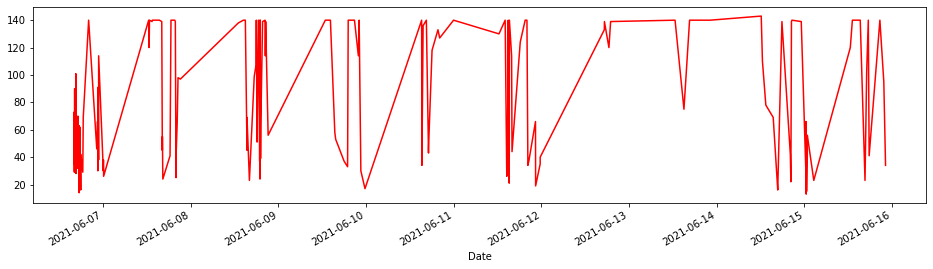

In [36]:
# Lenghts along time:
tlen.plot(figsize=(16,4), color='r');

Y para trazar los me gusta frente a los retweets en el mismo gráfico:

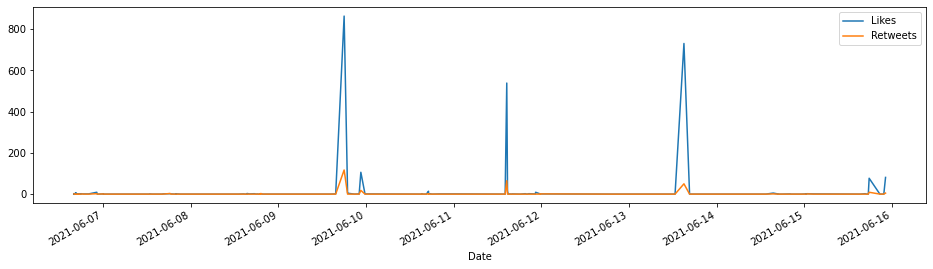

In [37]:
# Likes vs retweets visualization:
tfav.plot(figsize=(16,4), label="Likes", legend=True)
tret.plot(figsize=(16,4), label="Retweets", legend=True);

### 2.3. Gráficos circulares (Pie)

Ahora trazaremos las fuentes en un gráfico circular, ya que nos dimos cuenta de que no todos los tweets provienen de la misma fuente.

In [41]:
# Obtenemos los posibles fuentes de los tweets:
sources = []
for source in data['Source']:
    if source not in sources:
        sources.append(source)

# Visualizamos la lista de fuentes:
print("Lista de fuentes origen de los tweets:")
for source in sources:
    print("* {}".format(source))

Lista de fuentes origen de los tweets:
* Sprinklr


Ahora contamos el número de cada fuente y creamos un gráfico circular.

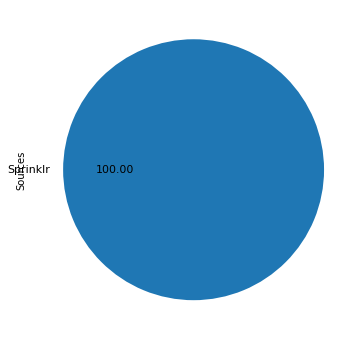

In [42]:
# We create a numpy vector mapped to labels:
percent = np.zeros(len(sources))

for source in data['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

percent /= 100

# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));

## 3. Análisis de Sentimientos

Textblob nos permitirá hacer análisis de sentimiento de una manera muy sencilla. También usaremos la biblioteca re de Python, que se usa para trabajar con expresiones regulares. Para esto, le proporcionaré dos funciones de utilidad para: a) limpiar texto (lo que significa que cualquier símbolo distinto a un valor alfanumérico será reasignado a uno nuevo que satisfaga esta condición), y b) crear un clasificador para analizar el polaridad de cada tweet después de limpiar el texto que contiene.

### 3.1 Importando Textblob

In [43]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Función de utilidad para limpiar el texto de un tweet eliminando
     enlaces y caracteres especiales que utilizan expresiones regulares.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Función de utilidad para clasificar la polaridad de un tweet
     usando textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

La forma en que funciona es que textblob ya proporciona un analizador entrenado (genial, ¿verdad?). Textblob puede trabajar con diferentes modelos de aprendizaje automático utilizados en el procesamiento del lenguaje natural. Solo agregaremos una columna adicional a nuestros datos. Esta columna contendrá el análisis de sentimiento y podemos trazar el dataframe para ver la actualización:

In [45]:
# Creamos una columna con el resultado del análisis:
data['SA'] = np.array([ analize_sentiment(tweet) for tweet in data['Tweets'] ])

# Mostramos el dataframe actualizado con la nueva columna:
display(data.head(10))

,Tweets,len,ID,Date,Source,Likes,RTs,SA
0,@dominos We just call it a Coke! 😎,34,1404924450492063747,2021-06-15 22:11:05,Sprinklr,81,5,0
1,@ms_ceciliajane Hi Cecilia. Please call our fo...,95,1404917273685544965,2021-06-15 21:42:34,Sprinklr,0,0,1
2,"@Brettonfry We'd like to help, Bretton. Please...",140,1404901074729848832,2021-06-15 20:38:12,Sprinklr,0,0,0
3,@UKCoachSkinner Cheers to the Wildcats! 🏐,41,1404856663564226563,2021-06-15 17:41:44,Sprinklr,77,9,0
4,@B3nzin0 Thanks for reaching out to us. Our de...,140,1404853181771886597,2021-06-15 17:27:54,Sprinklr,0,0,1
5,"@GriffinGonzalez We're glad you asked, Griffin...",102,1404846434147614721,2021-06-15 17:01:05,Sprinklr,0,0,1
6,@FairleyGraphic ❤️🧡💛💚💙💜,23,1404839581481156620,2021-06-15 16:33:51,Sprinklr,2,0,0
7,@Swiftino_ Thanks for reaching out and we'd li...,140,1404819873176469508,2021-06-15 15:15:32,Sprinklr,0,0,1
8,@vanduzee You can enjoy Coke with Coffee with ...,140,1404791136733085701,2021-06-15 13:21:21,Sprinklr,0,0,1
9,@Carabear_24 Hi Cara. While we can't make any ...,140,1404787359124762632,2021-06-15 13:06:20,Sprinklr,0,0,-1


### 3.2. Analizando los resultados

Para tener una forma sencilla de verificar los resultados, contaremos el número de tweets neutrales, positivos y negativos y extraeremos los porcentajes.

In [46]:
# Construimos listas con tweets clasificados:

pos_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(data['Tweets']) if data['SA'][index] < 0]

Ahora que tenemos las listas, solo imprimimos los porcentajes:

In [47]:
# Visualizamos los %:

print("Percentaje de positivos tweets: {}%".format(len(pos_tweets)*100/len(data['Tweets'])))
print("Percentaje de neutrales tweets: {}%".format(len(neu_tweets)*100/len(data['Tweets'])))
print("Percentaje de negativos tweets: {}%".format(len(neg_tweets)*100/len(data['Tweets'])))

Percentaje de positivos tweets: 43.5%
Percentaje de neutrales tweets: 45.0%
Percentaje de negativos tweets: 11.5%


Tenemos que considerar que estamos trabajando solo con los 1000 tweets más recientes. Para obtener resultados más precisos, podemos considerar más tweets.